# Oasis Infobyte Data Science 
# Task 3: Car Price Prediction with Machine Learning

Raghav Agarwal  
Dwarkadas J. Sanghvi College of Engineering  
October 2023

## Importing Modules

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

## Loading the data

In [2]:
car_data = pd.read_csv(r"C:\Users\abhay\OneDrive\Documents\Oasis Infobyte\Task 3\car_data.csv")

## Preprocessing the data

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


C:\Users\abhay\AppData\Local\Temp\ipykernel_23140\2358844682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = car_data.corr()


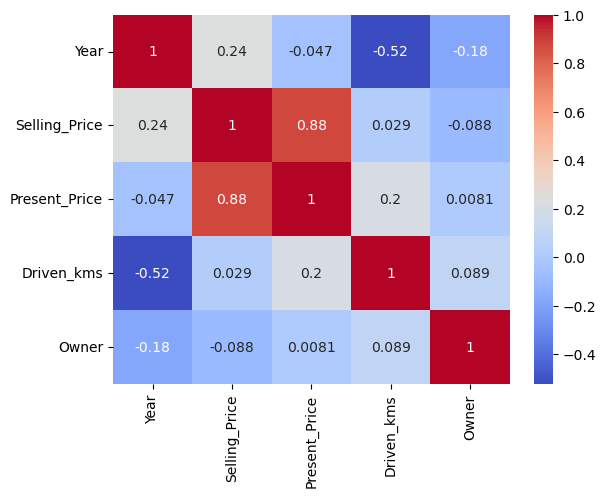

In [5]:
corr_matrix = car_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm");

Encoding categorical variables:

In [6]:
car_data = pd.get_dummies(car_data, columns=["Fuel_Type", "Selling_type", "Transmission"])

Changing "Year" cloumn to car age:

In [7]:
current_year = pd.Timestamp.now().year
car_data["Car_Age"] = current_year - car_data["Year"]
car_data = car_data.drop("Year", axis=1)

Scaling numerical variables:  

In [8]:
scaler = MinMaxScaler()
car_data[["Driven_kms", "Car_Age"]] = scaler.fit_transform(car_data[["Driven_kms", "Car_Age"]])

## Data Analysis

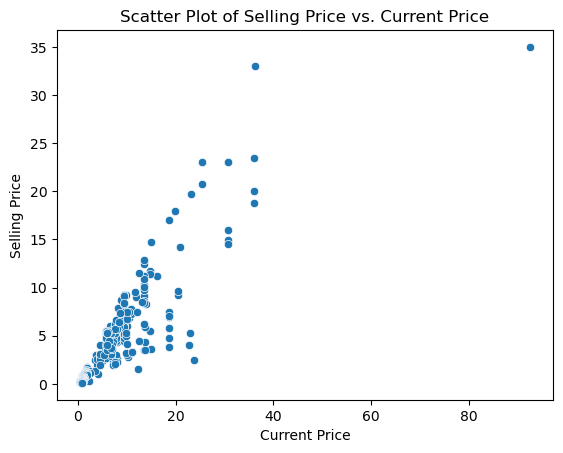

In [9]:
sns.scatterplot(data=car_data, x="Present_Price", y="Selling_Price")
plt.title("Scatter Plot of Selling Price vs. Current Price")
plt.xlabel("Current Price")
plt.ylabel("Selling Price");

There is a clear outlier for the max value of selling and present price. So, we drop the corresponding row.  
_Edit: We found better results without dropping this row, so we will not drop it. This could be due to selling and present price having the same correlation as other data points._

In [10]:
#car_data = car_data.drop(car_data["Present_Price"].idxmax())

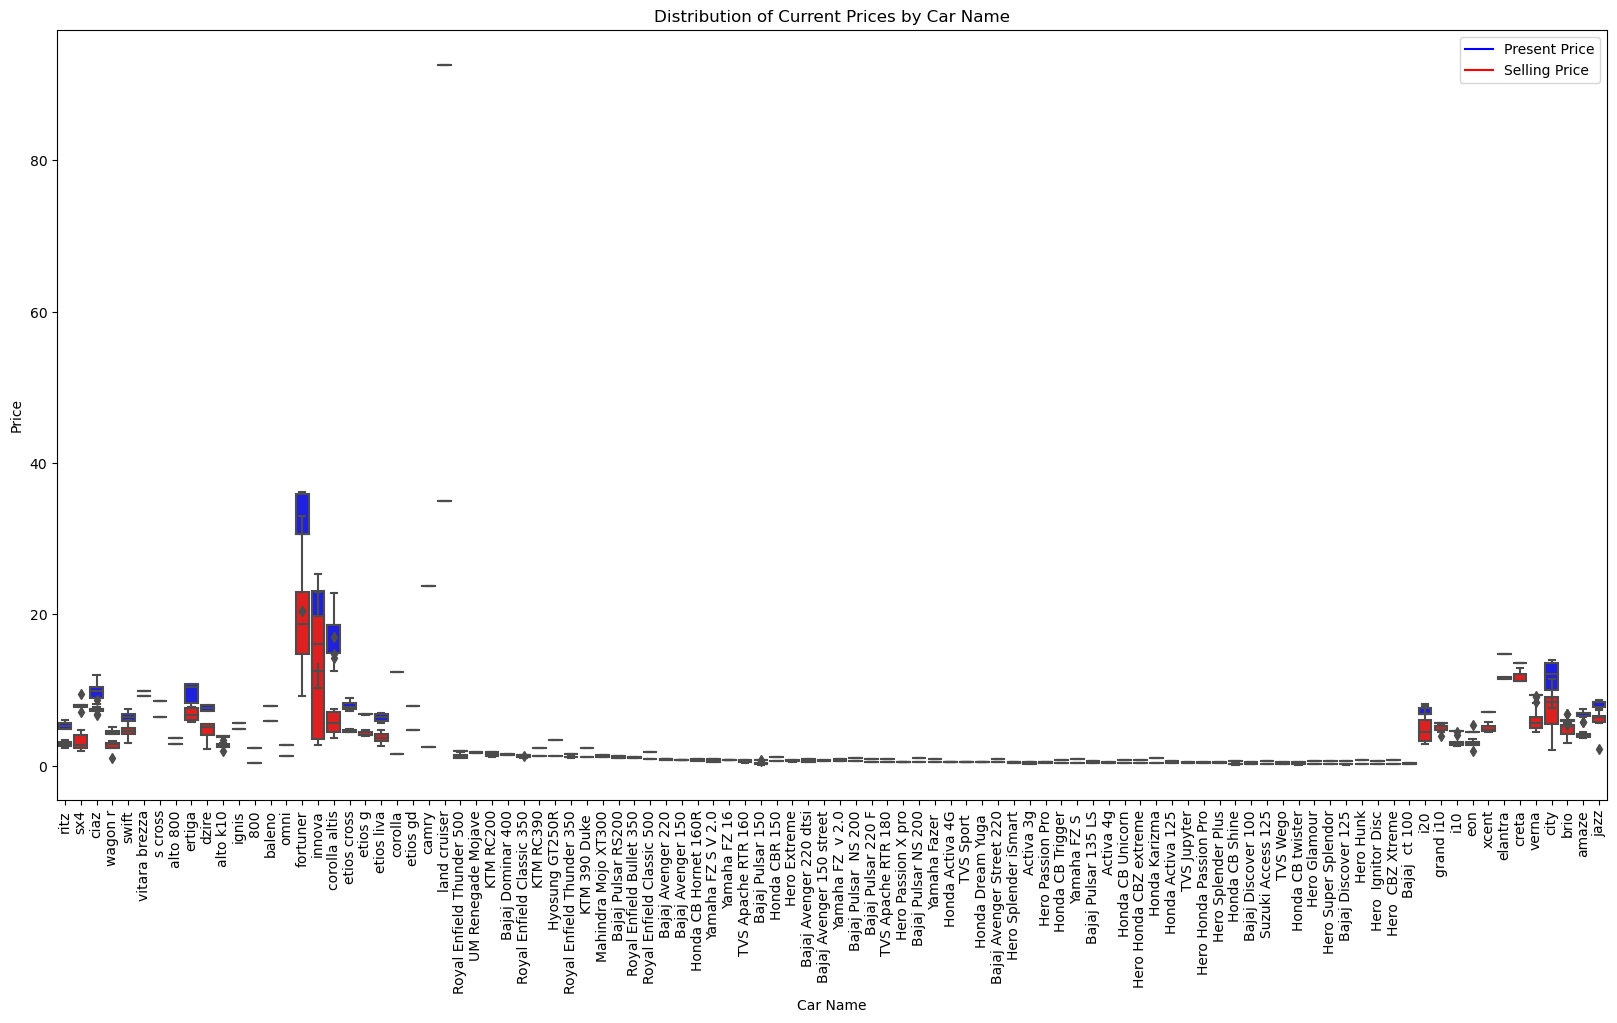

In [11]:
plt.figure(figsize=(20, 10)) 
sns.boxplot(data=car_data, x="Car_Name", y="Present_Price", color="blue")
sns.boxplot(data=car_data, x="Car_Name", y="Selling_Price", color="red")
plt.xticks(rotation=90) 
plt.title("Distribution of Current Prices by Car Name")
plt.xlabel("Car Name")
plt.ylabel("Price")
legend_elements = [Line2D([0], [0], color="blue", label="Present Price"),
                  Line2D([0], [0], color="red", label="Selling Price")]
plt.legend(handles=legend_elements);

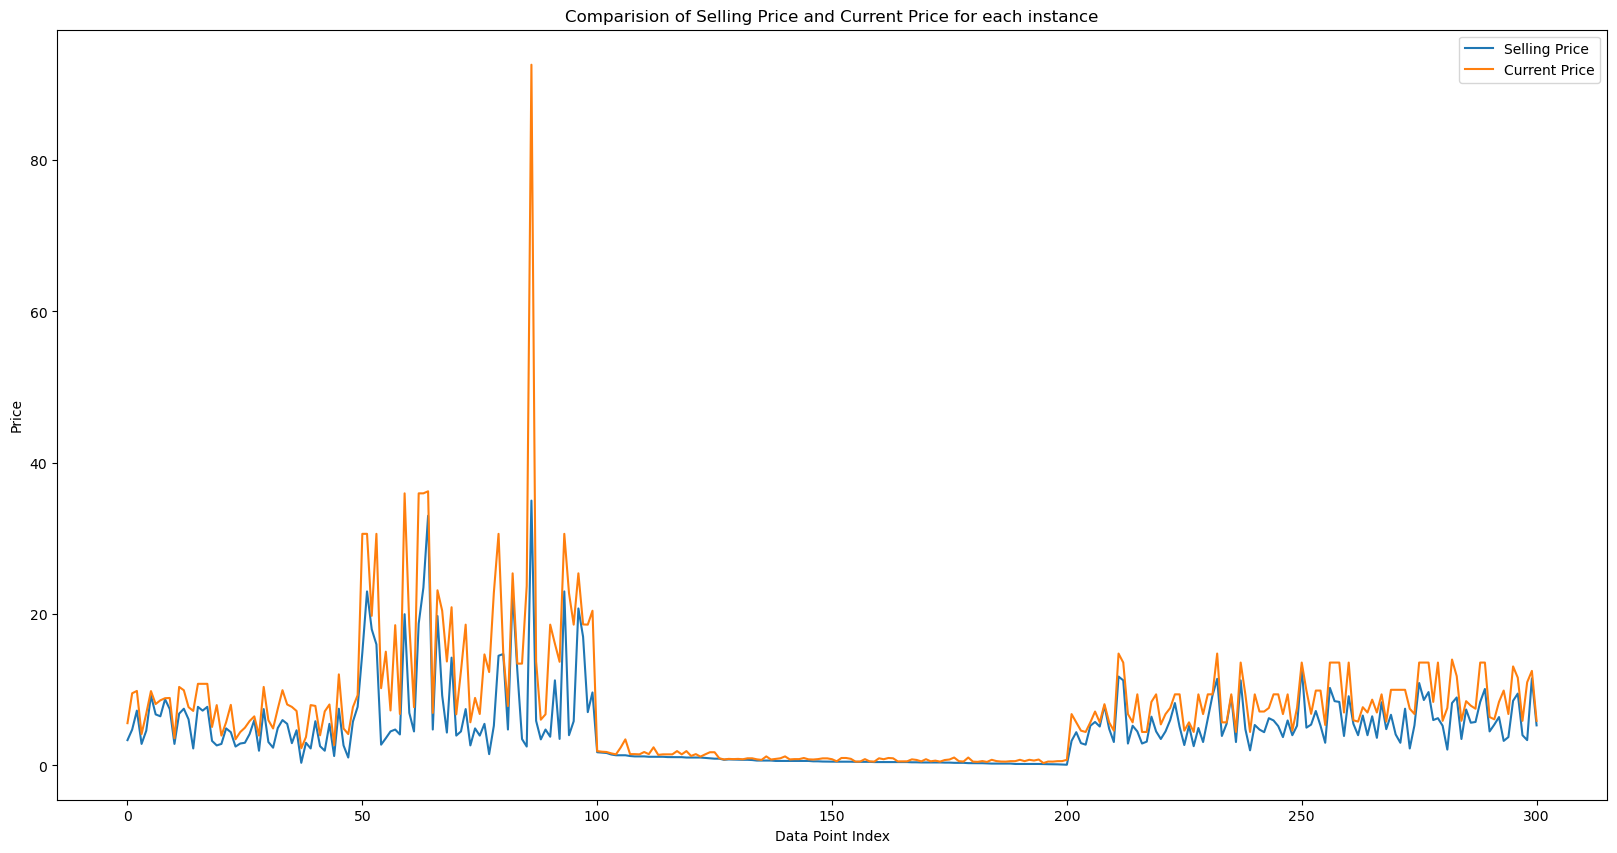

In [12]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=car_data, x=car_data.index, y="Selling_Price", label="Selling Price")
sns.lineplot(data=car_data, x=car_data.index, y="Present_Price", label="Current Price")

plt.title("Comparision of Selling Price and Current Price for each instance")
plt.xlabel("Data Point Index")
plt.ylabel("Price")
plt.legend();

## Training the Model

In [13]:
X = car_data.drop(["Car_Name", "Selling_Price"], axis=1)
y = car_data["Selling_Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Note: Here we are dropping the column with the names of the cars, but later we will also take them into account by encoding them and then compare the results.

In [14]:
X.head()

,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age
0,5.59,0.053053,0,0,0,1,1,0,0,1,0.266667
1,9.54,0.085085,0,0,1,0,1,0,0,1,0.333333
2,9.85,0.012813,0,0,0,1,1,0,0,1,0.066667
3,4.15,0.009409,0,0,0,1,1,0,0,1,0.466667
4,6.87,0.083984,0,0,1,0,1,0,0,1,0.266667


In [15]:
y.describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

In [16]:
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()

In [17]:
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor()

## Evaluating the models

In [18]:
linear_reg_predictions = linear_reg.predict(X_test)
decision_tree_predictions = decision_tree_reg.predict(X_test)
random_forest_predictions = random_forest_reg.predict(X_test)

In [19]:
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)

print("Linear Regression MSE:", linear_reg_mse)
print("Decision Tree MSE:", decision_tree_mse)
print("Random Forest MSE:", random_forest_mse)

Linear Regression MSE: 3.481349830511854
Decision Tree MSE: 0.9510032786885245
Random Forest MSE: 0.8967347293442625


## Comparision of the models

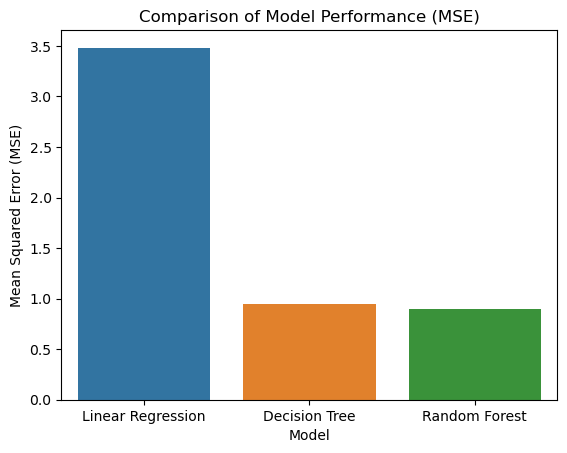

In [20]:
x1 = ["Linear Regression", "Decision Tree", "Random Forest"]
y1 = [linear_reg_mse, decision_tree_mse, random_forest_mse]

sns.barplot(x=x1, y=y1)
plt.title("Comparison of Model Performance (MSE)")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)");

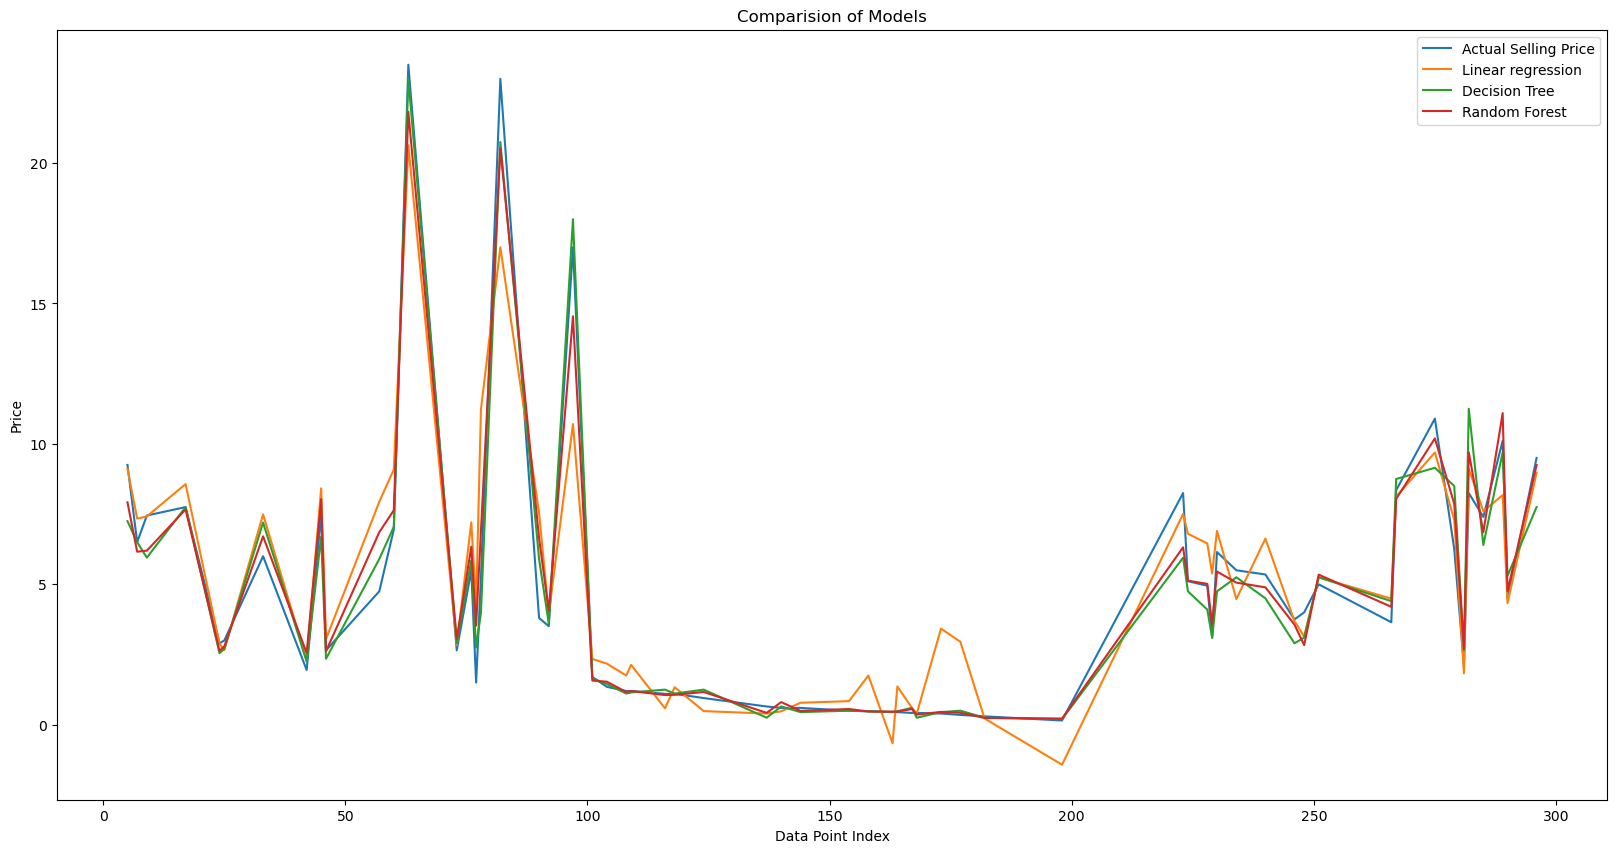

In [21]:
compare = pd.DataFrame({
    "Selling_Price": y_test,
    "Linear_Regression_Predictions": linear_reg_predictions,
    "Decision_Tree_Predictions": decision_tree_predictions,
    "Random_Forest_Predictions": random_forest_predictions
})

plt.figure(figsize=(20, 10))
sns.lineplot(data=compare, x=compare.index, y="Selling_Price", label="Actual Selling Price")
sns.lineplot(data=compare, x=compare.index, y="Linear_Regression_Predictions", label="Linear regression")
sns.lineplot(data=compare, x=compare.index, y="Decision_Tree_Predictions", label="Decision Tree")
sns.lineplot(data=compare, x=compare.index, y="Random_Forest_Predictions", label="Random Forest")

plt.title("Comparision of Models")
plt.xlabel("Data Point Index")
plt.ylabel("Price")
plt.legend();

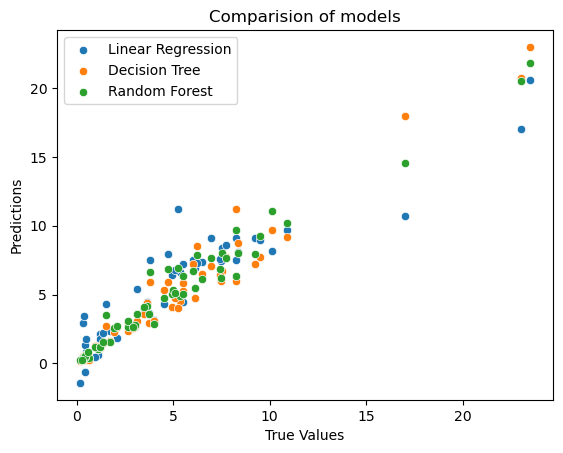

In [22]:
sns.scatterplot(data=compare, x="Selling_Price", y="Linear_Regression_Predictions", label="Linear Regression")
sns.scatterplot(data=compare, x="Selling_Price", y="Decision_Tree_Predictions", label="Decision Tree")
sns.scatterplot(data=compare, x="Selling_Price", y="Random_Forest_Predictions", label="Random Forest")

plt.title("Comparision of models")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend();

## Encoding the car names to test influence on predictions

Now, we will one hot encode the car names to test whether they positively or negatively influence the car price predictions. Earlier, we had simply dropped that column.

In [23]:
car_data2 = pd.get_dummies(car_data, columns=["Car_Name"])

In [24]:
car_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Columns: 110 entries, Selling_Price to Car_Name_xcent
dtypes: float64(4), int64(1), uint8(105)
memory usage: 42.8 KB


### Training

In [25]:
X2 = car_data2.drop("Selling_Price", axis=1)
y2 = car_data2["Selling_Price"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [26]:
random_forest_reg2 = RandomForestRegressor()

In [27]:
random_forest_reg2.fit(X_train2, y_train2)

RandomForestRegressor()

### Evaluating

In [28]:
random_forest_predictions2 = random_forest_reg2.predict(X_test2)

In [29]:
random_forest_mse2 = mean_squared_error(y_test2, random_forest_predictions2)
print("Random Forest 2 MSE :", random_forest_mse2)

Random Forest 2 MSE : 0.8585771972131153


### Comparision

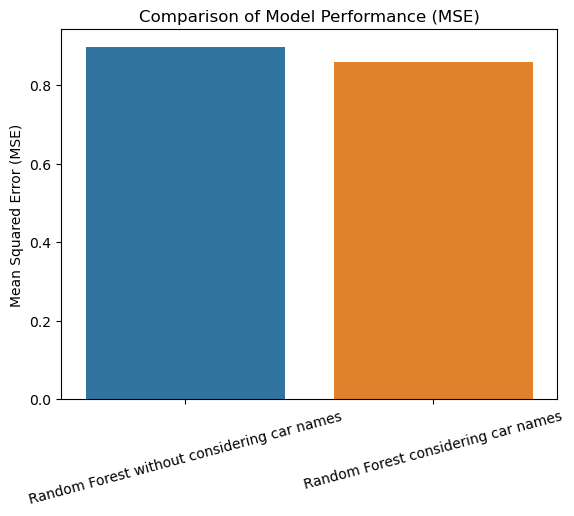

In [30]:
x3 = ["Random Forest without considering car names", "Random Forest considering car names"]
y3 = [random_forest_mse, random_forest_mse2]

sns.barplot(x=x3, y=y3)
plt.title("Comparison of Model Performance (MSE)")
plt.ylabel("Mean Squared Error (MSE)")
plt.xticks(rotation=15);

In [31]:
compare["Random_Forest_Predictions2"] = random_forest_predictions2

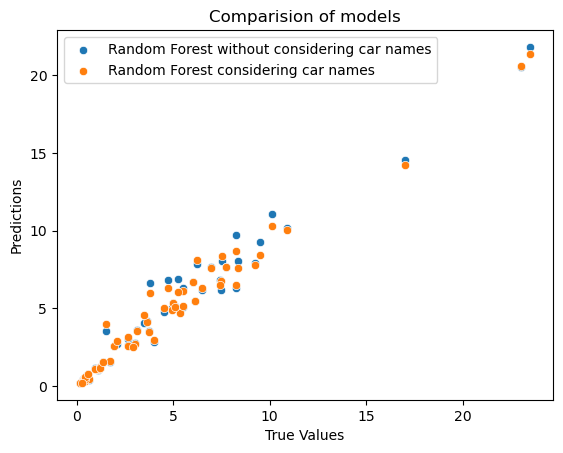

In [32]:
sns.scatterplot(data=compare, x="Selling_Price", y="Random_Forest_Predictions", label="Random Forest without considering car names")
sns.scatterplot(data=compare, x="Selling_Price", y="Random_Forest_Predictions2", label="Random Forest considering car names")

plt.title("Comparision of models")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend();

## Conclusion

In this project, we embarked on a comprehensive journey through the world of data science and machine learning using a car dataset. We learned the importance of preparing data by encoding categorical variables, feature scaling numerical variables and converting columns to suit our needs. Three regression algorithms - Linear Regression, Decision Trees, and Random Forest - were employed to predict car prices, and their performance was evaluated using the metric Mean Squared Error (MSE). We found that Random Forest performed the best. We then trained another Random Forest model in which we took into account the car names this time by one hot encoding them. We then discovered that this improved performance over the previous model. Data visualization played a pivotal role throughout while gaining insights and comparing model performance.  

We also the compared the effects of scaling the numerical variables and not scaling them, as well as removing an outlier and not removing it. We found that scaling and not removing the outlier was the best performing combination.

Overall, this project has provided invaluable experience in the end-to-end process of working with data, building machine learning models, and preparing for real-world data science challenges.